In [74]:
###############
### IMPORTS ###
###############

import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
####################
### Scrape Names ###
####################

URL = "https://www.ssa.gov/oact/babynames/"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")
results = soup.find(class_ = "c-table")
names = results.find_all("td")

In [76]:
########################################
### Extract names and generate table ###
########################################

students= []

for name in names:
    try:
        int(name.get_text(strip=True))
    except:
        students.append(name.get_text(strip=True))

grades = np.random.randint(101, size=(20,5))

grades_dataframe = pd.DataFrame(grades, index = students, columns = [f'Test {i}' for i in range(1,6)])

In [86]:
grades_dataframe['Average'] = grades_dataframe.apply(np.mean, axis=1)
grades_dataframe.sort_values(by=['Average'], ascending=False ,inplace=True)
grades_dataframe = grades_dataframe.append(grades_dataframe.apply(np.mean).rename('Average'))

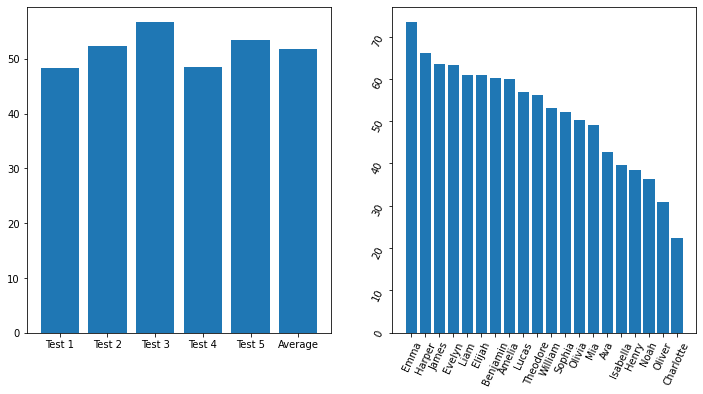

In [98]:
from sympy import rotations


fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].bar(grades_dataframe.columns, grades_dataframe.iloc[-1])
ax[1].bar(grades_dataframe.index[:-1], grades_dataframe.Average[:-1])
ax[1].tick_params(labelrotation=65)
plt.show()